# Лабораторна робота №2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib). Маринін Іван Павло Ігорович, ФІ-32мн

Датасет: https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from time import time
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from PIL import Image
from IPython.display import display

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('medicalmalpractice.csv', delimiter=',')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


Amount      Severity           Age  Private Attorney  \
count   79210.000000  79210.000000  79210.000000      79210.000000   
mean   157484.554816      4.799659     42.701868          0.660889   
std    193135.093293      2.083439     19.811063          0.473411   
min      1576.000000      1.000000      0.000000          0.000000   
25%     43670.250000      3.000000     28.000000          0.000000   
50%     98131.000000      4.000000     43.000000          1.000000   
75%    154675.250000      7.000000     58.000000          1.000000   
max    926411.000000      9.000000     87.000000          1.000000   

       Marital Status  
count    79210.000000  
mean         1.889559  
std          1.002502  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          4.000000

In [3]:
df = df[df.apply(lambda x: x.ne('Unknown').all(), axis=1)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55158 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            55158 non-null  int64 
 1   Severity          55158 non-null  int64 
 2   Age               55158 non-null  int64 
 3   Private Attorney  55158 non-null  int64 
 4   Marital Status    55158 non-null  int64 
 5   Specialty         55158 non-null  object
 6   Insurance         55158 non-null  object
 7   Gender            55158 non-null  object
dtypes: int64(5), object(3)
memory usage: 3.8+ MB
None


In [4]:
# Specialty = df['Specialty']
# df.drop('Specialty', axis='columns', inplace=True)

# df = pd.get_dummies(df, drop_first=True)
# df.info()
# df.describe()

**Завдання 1.** Зниження розмірності і візуалізація даних.

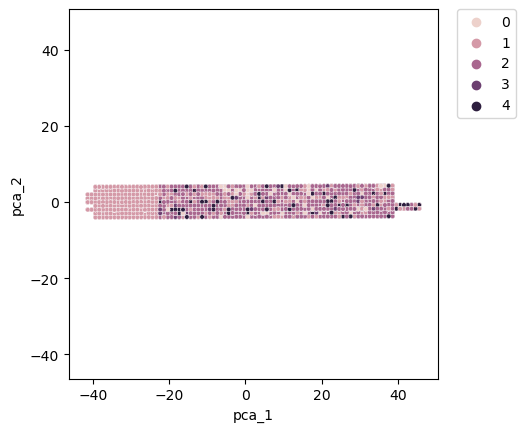

In [5]:
x = df.drop(columns=['Amount', 'Specialty', 'Insurance', 'Gender', 'Marital Status'])
y = df['Marital Status']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

y = np.array(y)
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax, s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


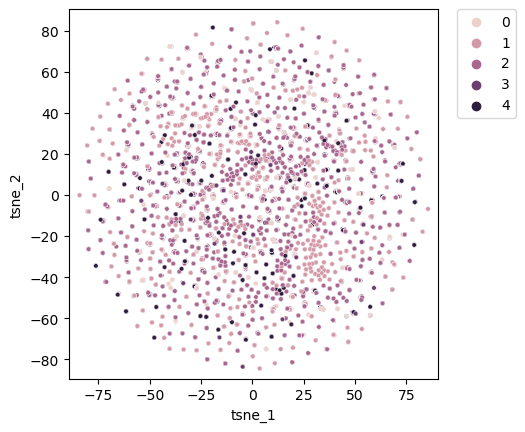

In [6]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

**Завдання 2.** Кластерний аналіз.

Fitting model on a small sub-sample of the data
done in 0.569s.
Predicting color indices on the full image (k-means)
done in 0.365s.
Predicting color indices on the full image (random)
done in 2.814s.


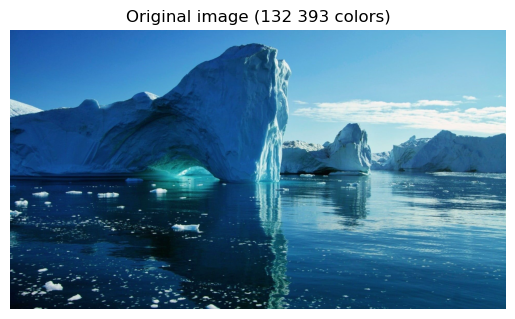

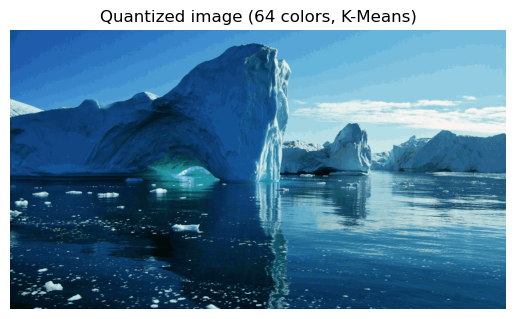

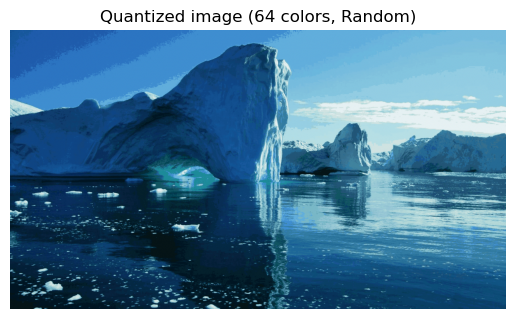

In [15]:
n_colors = 64

ice = Image.open('ice.jpg')

ice = np.array(ice, dtype=np.float64) / 255

w, h, d = original_shape = tuple(ice.shape)
assert d == 3
image_array = np.reshape(ice, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (132 393 colors)")
plt.imshow(ice)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


Fitting model on a small sub-sample of the data
done in 0.378s.
Predicting color indices on the full image (k-means)
done in 0.279s.
Predicting color indices on the full image (random)
done in 1.346s.


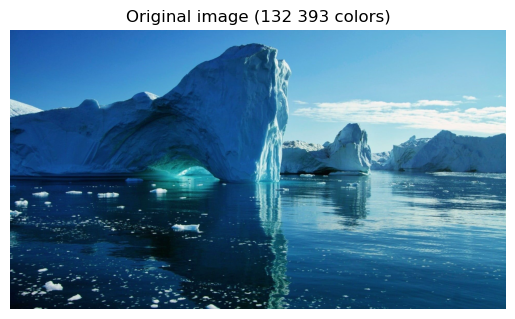

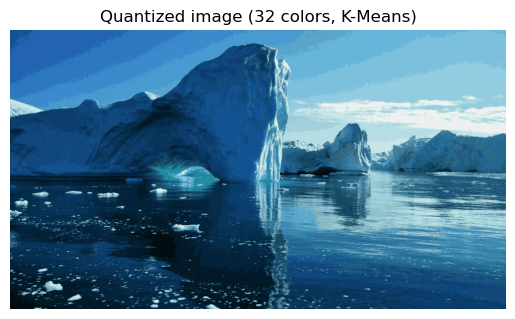

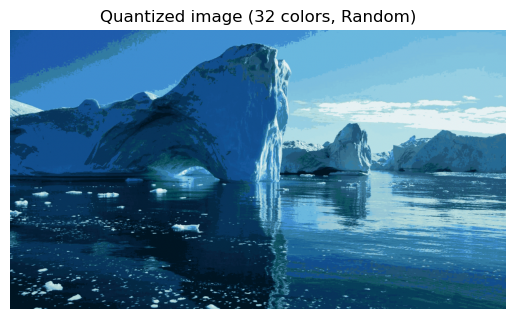

In [16]:
n_colors = 32

ice = Image.open('ice.jpg')

ice = np.array(ice, dtype=np.float64) / 255

w, h, d = original_shape = tuple(ice.shape)
assert d == 3
image_array = np.reshape(ice, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (132 393 colors)")
plt.imshow(ice)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


Fitting model on a small sub-sample of the data
done in 0.317s.
Predicting color indices on the full image (k-means)
done in 0.240s.
Predicting color indices on the full image (random)
done in 0.874s.


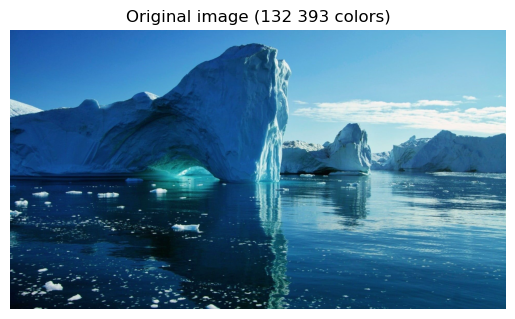

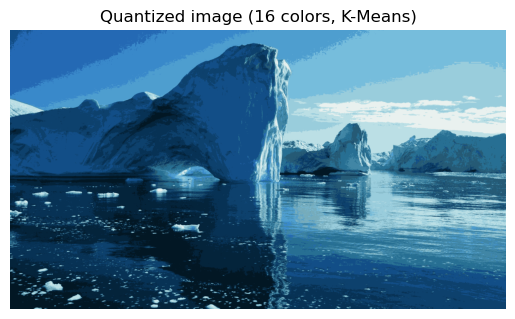

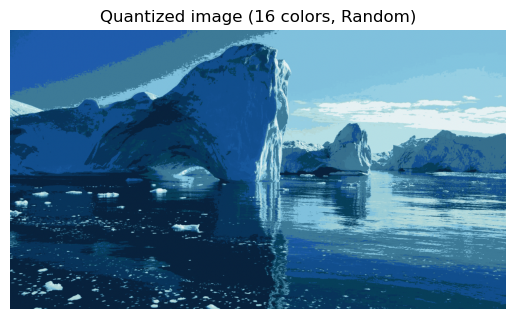

In [19]:
n_colors = 16

ice = Image.open('ice.jpg')

ice = np.array(ice, dtype=np.float64) / 255

w, h, d = original_shape = tuple(ice.shape)
assert d == 3
image_array = np.reshape(ice, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (132 393 colors)")
plt.imshow(ice)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


Fitting model on a small sub-sample of the data
done in 0.279s.
Predicting color indices on the full image (k-means)
done in 0.223s.
Predicting color indices on the full image (random)
done in 0.545s.


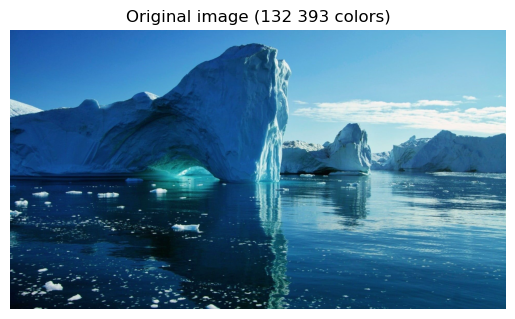

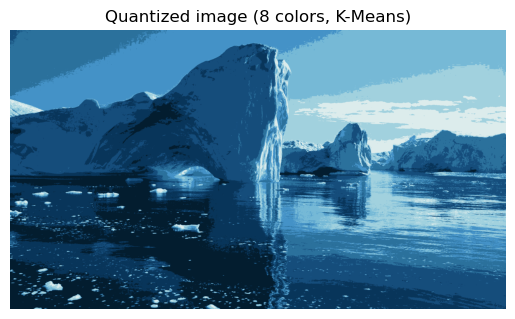

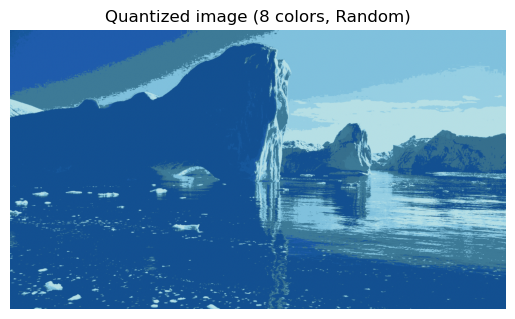

In [18]:
n_colors = 8

ice = Image.open('ice.jpg')

ice = np.array(ice, dtype=np.float64) / 255

w, h, d = original_shape = tuple(ice.shape)
assert d == 3
image_array = np.reshape(ice, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (132 393 colors)")
plt.imshow(ice)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


**Завдання 3.** Обробка та класифікація текстових даних

In [10]:
df = pd.read_csv('Mental Health Dataset.csv', delimiter=',')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


intensity
count  10392.000000
mean      -0.545804
std        0.783957
min       -2.000000
25%       -1.000000
50%       -1.000000
75%        0.000000
max        1.000000

In [15]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print(df['posts'][0])
print(df['predicted'][0])
print(df['intensity'][0])

I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

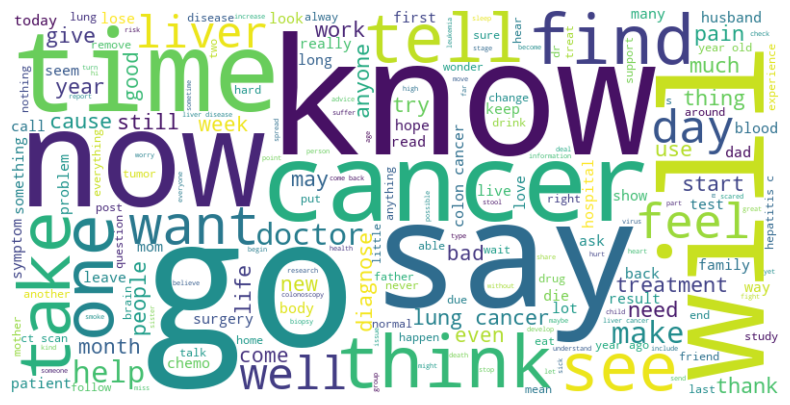

In [16]:
text = ''
for i in range(len(df['posts'])):
    if type(df['posts'][i]) != type('a'):
        print(i, df['posts'][i])
    text += df['posts'][i].lower() + ' '
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

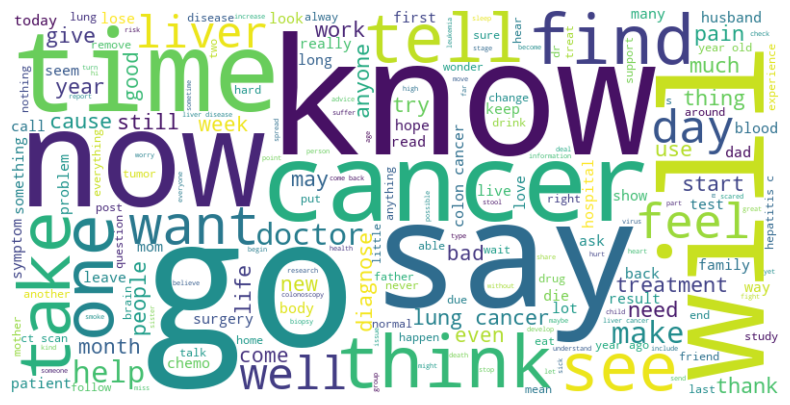

In [24]:
all_text = " ".join(df['posts'])
wc = WordCloud(stopwords = STOPWORDS).generate(all_text)

def remove_words(input_string, words_to_remove):
    for word in words_to_remove:
        input_string = input_string.replace(word, '')
    return input_string

words_to_remove = ['http', 'www']
all_text = remove_words(all_text, words_to_remove)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
x = df['posts']
y = df['intensity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

tfidf_vectorizer = TfidfVectorizer(max_df=1000, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test =  tfidf_vectorizer.transform(x_test)

clf = LogisticRegression().fit(tfidf_train, y_train)
predicted = clf.predict(tfidf_test)

print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

          -2       0.72      0.47      0.57       108
          -1       0.72      0.78      0.75       418
           0       0.76      0.85      0.80       438
           1       0.64      0.18      0.29        76

    accuracy                           0.73      1040
   macro avg       0.71      0.57      0.60      1040
weighted avg       0.73      0.73      0.72      1040

[[ 51  48   6   3]
 [ 13 325  75   5]
 [  1  63 374   0]
 [  6  18  38  14]]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
